Initialise, set the path and import librarys

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import os
currPth = os.getcwd()
print(currPth)
import sys
sys.path.append("//home/ubuntu/fastai/") # go to parent dir

/home/ubuntu/fastai/courses/data/EnergyPriceDLModel


    (For some reason I have to tell FastAI where the parent dir is)

Import everything needed

In [4]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.dataset import *
from fastai.dataset import *
from fastai.plots import *

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler

from IPython.display import HTML

In [5]:
PATH="//home/ubuntu/fastai/courses/data/EnergyPriceDLModel/"

Set the Training & Testing data sets, import them from csv, parse the Date Column, have a look at it

In [6]:
data_Train = pd.read_csv(f'{PATH}Train_144MAVpc1K.csv', parse_dates=['Date'])
data_Train

,Index,Date,Time,TimeOfDay,Demand,DemandMAV,Price,PriceMAV,MaxTemp,MinTemp,Rainfall
0,144,2000-04-01,0:00,Midnight,4365.84000,4084.432,24.07,21.73855,28.0,19.0,0.01
1,145,2000-04-01,0:30,Midnight,4074.58667,4085.113,18.65,21.13730,28.0,19.0,0.01
2,146,2000-04-01,1:00,Midnight,3878.08333,4086.287,17.50,20.99320,28.0,19.0,0.01
3,147,2000-04-01,1:30,Midnight,3699.40667,4086.442,17.50,20.87737,28.0,19.0,0.01
4,148,2000-04-01,2:00,Midnight,3617.21333,4085.644,17.50,20.75445,28.0,19.0,0.01
5,149,2000-04-01,2:30,Midnight,3559.15833,4085.031,18.50,20.69868,28.0,19.0,0.01
6,150,2000-04-01,3:00,Early Morning,3515.90833,4084.639,19.06,20.69834,28.0,19.0,0.01
7,151,2000-04-01,3:30,Early Morning,3496.85667,4084.630,18.01,20.70188,28.0,19.0,0.01
8,152,2000-04-01,4:00,Early Morning,3502.48500,4085.006,17.43,20.70542,28.0,19.0,0.01
9,153,2000-04-01,4:30,Early Morning,3551.45667,4085.911,18.03,20.70494,28.0,19.0,0.01


In [7]:
data_Test = pd.read_csv(f'{PATH}Test_144MAVpc1K.csv', parse_dates=['Date'])
data_Test.head(20)

,Index,Date,Time,TimeOfDay,Demand,DemandMAV,Price,PriceMAV,MaxTemp,MinTemp,Rainfall
0,144,2017-05-12,0:00,Midnight,5735.07,6348.393,0,0,30.5,17.0,23.6
1,145,2017-05-12,0:30,Midnight,5588.12,6346.787,0,0,30.5,17.0,23.6
2,146,2017-05-12,1:00,Midnight,5453.39,6345.361,0,0,30.5,17.0,23.6
3,147,2017-05-12,1:30,Midnight,5300.85,6344.111,0,0,30.5,17.0,23.6
4,148,2017-05-12,2:00,Midnight,5278.81,6342.639,0,0,30.5,17.0,23.6
5,149,2017-05-12,2:30,Midnight,5256.67,6341.511,0,0,30.5,17.0,23.6
6,150,2017-05-12,3:00,Early Morning,5205.50,6340.543,0,0,30.5,17.0,23.6
7,151,2017-05-12,3:30,Early Morning,5200.33,6339.239,0,0,30.5,17.0,23.6
8,152,2017-05-12,4:00,Early Morning,5212.01,6337.955,0,0,30.5,17.0,23.6
9,153,2017-05-12,4:30,Early Morning,5235.56,6336.788,0,0,30.5,17.0,23.6


Check lengths of data set

In [8]:
len(data_Train)

315448

In [9]:
len(data_Test)

9071

Add Extra Date information

In [10]:
add_datepart(data_Train, "Date", drop=False)

In [11]:
add_datepart(data_Test, "Date", drop=False)

Adjust Columns, discard unnecessary data

In [12]:
data_Train.columns

Index(['Index', 'Date', 'Time', 'TimeOfDay', 'Demand', 'DemandMAV', 'Price',
       'PriceMAV', 'MaxTemp', 'MinTemp', 'Rainfall', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed'],
      dtype='object')

In [13]:
data_Test.columns

Index(['Index', 'Date', 'Time', 'TimeOfDay', 'Demand', 'DemandMAV', 'Price',
       'PriceMAV', 'MaxTemp', 'MinTemp', 'Rainfall', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed'],
      dtype='object')

In [14]:
columns = ['Demand','Price','MaxTemp','MinTemp','Rainfall','Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed']

In [15]:
data_Train.drop(columns,1,inplace=True)

In [16]:
columns = ['Demand','Price','PriceMAV','MaxTemp','MinTemp','Rainfall','Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed']

In [17]:
data_Test.drop(columns,1,inplace=True)

In [18]:
data_Train.columns

Index(['Index', 'Date', 'Time', 'TimeOfDay', 'DemandMAV', 'PriceMAV', 'Year',
       'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear'],
      dtype='object')

In [19]:
data_Test.columns

Index(['Index', 'Date', 'Time', 'TimeOfDay', 'DemandMAV', 'Year', 'Month',
       'Week', 'Day', 'Dayofweek', 'Dayofyear'],
      dtype='object')

Backup to feather

In [20]:
data_Train.reset_index(inplace=True)
data_Test.reset_index(inplace=True)

In [21]:
data_Train.to_feather(f'{PATH}df')
data_Test.to_feather(f'{PATH}df_test')

Load the data from Feather

In [22]:
data_Train = pd.read_feather(f'{PATH}df')

In [23]:
data_Test= pd.read_feather(f'{PATH}df_test')

Convert DateTime to datetime for both datasets

In [24]:
data_Train["Date"] = pd.to_datetime(data_Train.Date)

In [25]:
data_Test["Date"] = pd.to_datetime(data_Test.Date)

Check data

In [26]:
data_Train.head().T.head(12)

,0,1,2,3,4
index,0,1,2,3,4
Index,144,145,146,147,148
Date,2000-04-01 00:00:00,2000-04-01 00:00:00,2000-04-01 00:00:00,2000-04-01 00:00:00,2000-04-01 00:00:00
Time,0:00,0:30,1:00,1:30,2:00
TimeOfDay,Midnight,Midnight,Midnight,Midnight,Midnight
DemandMAV,4084.43,4085.11,4086.29,4086.44,4085.64
PriceMAV,21.7386,21.1373,20.9932,20.8774,20.7544
Year,2000,2000,2000,2000,2000
Month,4,4,4,4,4
Week,13,13,13,13,13


Set Category and Continuous Variables

In [27]:
cat_vars = ['Date', 'Time','TimeOfDay','Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear']
contin_vars = ['DemandMAV']
n = len(data_Train); n

315448

In [28]:
dep = 'PriceMAV'
data_Train = data_Train[cat_vars+contin_vars+[dep, 'Index']].copy()

In [29]:
data_Test[dep] = 0
data_Test = data_Test[cat_vars+contin_vars+[dep, 'Index']].copy()

In [30]:
for v in cat_vars: data_Train[v] = data_Train[v].astype('category').cat.as_ordered()

In [31]:
data_Test.columns

Index(['Date', 'Time', 'TimeOfDay', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'DemandMAV', 'PriceMAV', 'Index'],
      dtype='object')

In [32]:
data_Train.columns

Index(['Date', 'Time', 'TimeOfDay', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'DemandMAV', 'PriceMAV', 'Index'],
      dtype='object')

In [33]:
apply_cats(data_Test, data_Train)

Set Continuous Variables to Float32

In [34]:
for v in contin_vars:
    data_Train[v] = data_Train[v].astype('float32')
    data_Test[v] = data_Test[v].astype('float32')

Set DateTime as index for both

In [35]:
data_Train = data_Train.set_index("Index")

In [36]:
data_Test = data_Test.set_index("Index")

Split off response variable (Price) and convert dataframe to entirely numeric data

In [37]:
df, y, nas, mapper = proc_df(data_Train, 'PriceMAV', do_scale=True)
yl = np.log(y)

In [38]:
df_test, _, nas, mapper = proc_df(data_Test, 'PriceMAV', do_scale=True, mapper=mapper, na_dict=nas)

Set validation set to last 25% of Training set

In [39]:
samp_size = len(df)

In [40]:
#train_ratio = 0.65
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

Define Root-mean-squared percent error to use as metric

In [41]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

Create ModelData from DataFrame

In [42]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=64,
                                      test_df=df_test)

Use the cardinal for each Categorical variable for embeddings

In [43]:
cat_sz = [(c, len(data_Train[c].cat.categories)+1) for c in cat_vars]

In [44]:
cat_sz

[('Date', 6573),
 ('Time', 49),
 ('TimeOfDay', 9),
 ('Year', 19),
 ('Month', 13),
 ('Week', 54),
 ('Day', 32),
 ('Dayofweek', 8),
 ('Dayofyear', 367)]

In [45]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [46]:
emb_szs

[(6573, 50),
 (49, 25),
 (9, 5),
 (19, 10),
 (13, 7),
 (54, 27),
 (32, 16),
 (8, 4),
 (367, 50)]

Find a Learning Rate

In [47]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),0.04, 1, [1000,500], [0.001,0.01],y_range=y_range)
lr = 0.001

In [48]:
m.lr_find()

 58%|█████▊    | 2126/3697 [00:16<00:11, 132.36it/s, loss=0.0969]

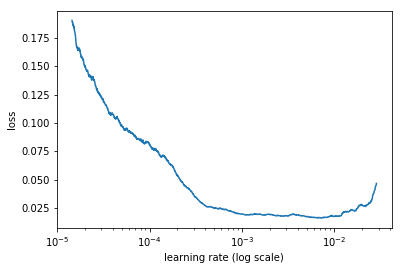

In [49]:
m.sched.plot(100)

Do some initial learning

In [50]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-4

In [51]:
m.fit(lr, 3, metrics=[exp_rmspe])

 18%|█▊        | 649/3697 [00:04<00:22, 136.74it/s, loss=0.0383]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.006236   0.351839   0.381192  
    1      0.004051   0.336438   0.373163                         
    2      0.002023   0.336069   0.369859                         



[array([0.33607]), 0.36985854597099793]

In [52]:
lrs = np.array([1e-4,1e-4,1e-3])

In [53]:
m.fit(lrs, 5, metrics=[exp_rmspe], cycle_len=3)

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.001233   0.337232   0.366219  
    1      0.00084    0.336698   0.365694                          
    2      0.0007     0.334091   0.364628                          
    3      0.000842   0.332552   0.361817                          
    4      0.000598   0.330155   0.360477                          
    5      0.000525   0.325952   0.359535                          
    6      0.000643   0.322598   0.356951                          
    7      0.000461   0.321811   0.357055                          
    8      0.000377   0.322179   0.357221                          
    9      0.000543   0.316861   0.354914                          
    10     0.000385   0.322238   0.357557                          
    11     0.00033    0.320612   0.356905                          
    12     0.000435   0.320086   0.356065                          
    13     0.000312   0.321491   0.357229                          
    1

[array([0.31977]), 0.35687063310379263]

In [58]:
v = m.model
v

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(6573, 50)
    (1): Embedding(49, 25)
    (2): Embedding(9, 5)
    (3): Embedding(19, 10)
    (4): Embedding(13, 7)
    (5): Embedding(54, 27)
    (6): Embedding(32, 16)
    (7): Embedding(8, 4)
    (8): Embedding(367, 50)
  )
  (lins): ModuleList(
    (0): Linear(in_features=195, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=1, bias=True)
  (emb_drop): Dropout(p=0.04)
  (drops): ModuleList(
    (0): Dropout(p=0.001)
    (1): Dropout(p=0.01)
  )
  (bn): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True)
)

In [54]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.08, 1, [1000,500], [0.0075,0.05], y_range=y_range)
lr = 1e-4

In [55]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.007008   0.277217   0.360526  
    1      0.004694   0.265209   0.351204                         
    2      0.003419   0.248869   0.341923                         



[array([0.24887]), 0.34192292923316786]

In [51]:
lrs = np.array([1e-4,1e-3,1e-3])

In [52]:
m.fit(lrs, 5, metrics=[exp_rmspe], cycle_len=3)

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.001475   0.287976   0.339104  
    1      0.000799   0.287763   0.338459                          
    2      0.000578   0.287883   0.338644                          
    3      0.000928   0.285854   0.336871                          
    4      0.000524   0.296615   0.34121                           
    5      0.00044    0.296304   0.340083                          
    6      0.000636   0.293223   0.337043                          
    7      0.000399   0.297301   0.338219                          
    8      0.000323   0.298794   0.338631                          
    9      0.00051    0.298489   0.337971                          
    10     0.000335   0.297989   0.337908                          
    11     0.000291   0.302681   0.338856                          
    12     0.000485   0.304025   0.338625                          
    13     0.000303   0.305422   0.338623                          
    1

[array([0.30648]), 0.3388422481426019]

In [53]:
#Single record 
test_record = df_test.iloc[1500]
test_record

Date           0.000000
Time          41.000000
TimeOfDay      7.000000
Year           0.000000
Month          5.000000
Week          18.000000
Day            1.000000
Dayofweek      2.000000
Dayofyear    121.000000
DemandMAV      2.146406
Name: 1644, dtype: float64

In [62]:
cat = test_record[cat_vars].values.astype(np.int64)[None]
contin = test_record.drop(cat_vars).values.astype(np.float32)[None]

#Prediction
model = m.model
model.eval()
prediction = to_np(model(V(cat), V(contin)))
print(f"Price prediction: {prediction}")

Price prediction: [[3.65977]]


In [63]:
v = np.exp(prediction)
v

array([[38.85253]], dtype=float32)

This is at the end of Rossmann, it exports the Test prediction to CSV

In [84]:
x,y=m.predict_with_targs()

In [85]:
exp_rmspe(x,y)

0.4114567076574474

In [86]:
pred_test=m.predict(True)

In [87]:
pred_test = np.exp(pred_test)

In [88]:
data_Test['PriceMAV'] = pred_test

In [89]:
csv_fn = f'{PATH}test_PriceMAV.csv'

In [90]:
data_Test[['PriceMAV']].to_csv(csv_fn, index=False)

In [91]:
FileLink(csv_fn)

//home/ubuntu/fastai/courses/data/EnergyPriceDLModel/test_PriceMAV.csv

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, yl)

In [69]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [70]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_, exp_rmspe(preds, y_val)

(0.9999797364944755,
 -0.29659814199356216,
 0.9998848636608001,
 0.9016760687152864)